## Import modules

In [41]:
import pandas as pd
from ydata_profiling import ProfileReport
import json
from matplotlib import pyplot as plt

## Import dataset

### About this dataset

This synthetic dataset contains 18 months worth of daily performance and attrition data (411,948 observations) for a factory whose organizational structure comprises 508 workers. Due to employee turnover, a total of 687 persons appear in the dataset. 

The dataset’s observations cover both regular daily events (like workers’ attendance and daily level of Efficacy) and special one-time events (like accidents, an employee’s termination, or the onboarding of a new employee). A unique feature of the dataset is diverse causal relationships “hidden” within the data that are waiting to be uncovered through machine learning.

Source: https://www.kaggle.com/datasets/gladdenme/factory-workers-daily-performance-attrition-s?resource=download

In [3]:
# Dataset 
workers_df = pd.read_csv("../data/raw/factory_workers.csv", sep=',', encoding="mac_roman")

## Explore Dataset

In [4]:
workers_df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,...,4,Friday,Presence,None,None,Presence,None,None,None,None
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,...,4,Friday,Efficacy,None,1.489,Efficacy,None,1.2,None,None
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,...,4,Friday,Presence,None,None,Presence,None,None,None,None
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,...,4,Friday,Efficacy,None,1.023,Efficacy,None,0.8,None,None
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714285714,...,4,Friday,Presence,None,None,Presence,None,None,None,None


## Understanding the Columns

In [5]:
# Full list of column names
columns = workers_df.columns.to_list()
columns

['sub_ID',
 'sub_fname',
 'sub_lname',
 'sub_age',
 'sub_sex',
 'sub_shift',
 'sub_team',
 'sub_role',
 'sub_coll_IDs',
 'sub_colls_same_sex_prtn',
 'sub_health_h',
 'sub_commitment_h',
 'sub_perceptiveness_h',
 'sub_dexterity_h',
 'sub_sociality_h',
 'sub_goodness_h',
 'sub_strength_h',
 'sub_openmindedness_h',
 'sub_workstyle_h',
 'sup_ID',
 'sup_fname',
 'sup_lname',
 'sup_age',
 'sup_sub_age_diff',
 'sup_sex',
 'sup_role',
 'sup_commitment_h',
 'sup_perceptiveness_h',
 'sup_goodness_h',
 'event_date',
 'event_week_in_series',
 'event_day_in_series',
 'event_weekday_num',
 'event_weekday_name',
 'behav_comptype_h',
 'behav_cause_h',
 'actual_efficacy_h',
 'record_comptype',
 'record_cause',
 'recorded_efficacy',
 'recorded_note_from_sup',
 'record_conf_matrix_h']

### Lookup Function

**Curious about what a specific column heading may mean?**

Use the provided lookup function, `get_column_desc()`, to find a description of what the values mean in that particular column.

In [6]:
# Import metadata for getting column descriptions
with open("../data/raw/metadata.json") as file:
    column_descriptions = json.load(file)


In [7]:
# Define a lookup function for getting the description of a column name
def get_column_desc(col_name, info=column_descriptions):
    """
    Provides a lookup function for a description of the column name. 
    
    Use if interested in the description of a particular column name, and what type of field it is. 
    
    Parameters:
    col_name(str): The column name you wish to lookup
    info(dict): A dictionary containing the information
    
    Returns: 
    dict: Returns column name, its type of field and its description.
    
    """
    return info[col_name]["Description"]

In [8]:
# Lookup description for 'sup_goodness_h' column 
get_column_desc('record_cause')

'In the case of a Termination event, this string indicates the reason for which the organization terminated the subject’s employment. For other event types, this field will be “None”.'

In [9]:
workers_df.info

<bound method DataFrame.info of           sub_ID  sub_fname sub_lname  sub_age sub_sex sub_shift sub_team  \
0       98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
1       98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
2       98000002       Joan    Winter       61       F   Shift 1   Team 2   
3       98000002       Joan    Winter       61       F   Shift 1   Team 2   
4       98000003  Elizabeth  Martinez       20       F   Shift 1   Team 3   
...          ...        ...       ...      ...     ...       ...      ...   
411943  98000787      Sarah    Marino       28       F   Shift 3  Team 21   
411944  98000788    Theresa      Dahl       47       F   Shift 1   Team 6   
411945  98000788    Theresa      Dahl       47       F   Shift 1   Team 6   
411946  98000789       Paul  Gonzalez       34       M   Shift 2  Team 12   
411947  98000789       Paul  Gonzalez       34       M   Shift 2  Team 12   

           sub_role                        

In [10]:
workers_df.columns

Index(['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift',
       'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn',
       'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h',
       'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h',
       'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID',
       'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex',
       'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h',
       'sup_goodness_h', 'event_date', 'event_week_in_series',
       'event_day_in_series', 'event_weekday_num', 'event_weekday_name',
       'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h',
       'record_comptype', 'record_cause', 'recorded_efficacy',
       'recorded_note_from_sup', 'record_conf_matrix_h'],
      dtype='object')

In [11]:
workers_df.index

RangeIndex(start=0, stop=411948, step=1)

In [12]:
workers_df.shape

(411948, 42)

In [13]:
# Find missing values per columns
missing_values = pd.concat([workers_df.isnull().sum(), 100*workers_df.isnull().mean()], axis=1)
missing_values.columns = ['Count', '%']
missing_values.sort_values(by=['Count','%'], ascending=False)

,Count,%
recorded_note_from_sup,358,0.086904
sub_ID,0,0.000000
sub_fname,0,0.000000
sub_lname,0,0.000000
sub_age,0,0.000000
sub_sex,0,0.000000
sub_shift,0,0.000000
sub_team,0,0.000000
sub_role,0,0.000000
sub_coll_IDs,0,0.000000


### Initial Exploration of the Data

There were 102 reported terminations over the 18 month period.

In [25]:
terminations = workers_df[workers_df["record_cause"] != "None"]
terminations['record_cause'].count()

102

There were 7 distinct reasons for termination.

In [36]:
reasons_for_terminations = terminations.record_cause
reasons_for_terminations.unique()

array(['Low Efficacy', 'Multiple Sabotages', 'Multiple Absences',
       'Multiple Disruptions', 'Multiple Lapses', 'Multiple Slips',
       'Lapses and Below-Average Efficacy'], dtype=object)

The reason for termination with the highest frequency is "Multiple Sabotages", followed by "Multiple Absences" and "Multiple Slips"

<Axes: title={'center': 'Reasons for Termination by Count'}, xlabel='Termination Reason'>

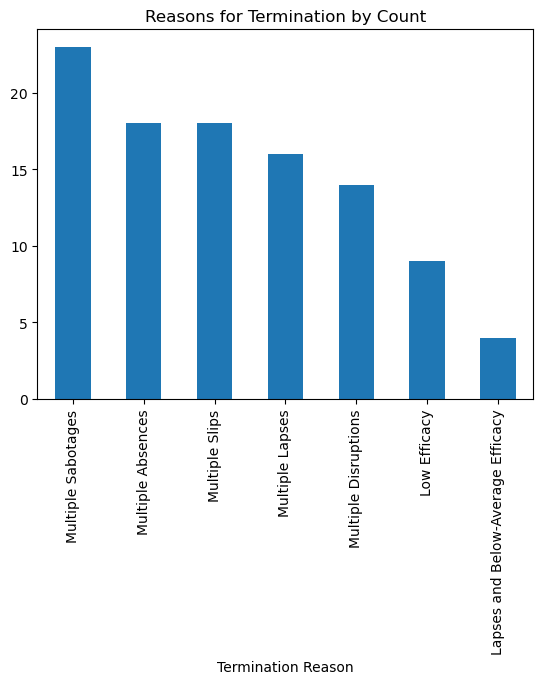

In [45]:
termination_reason_and_count = terminations.groupby(['record_cause'])['record_cause'].count().sort_values(ascending=False)
termination_reason_and_count.plot(kind="bar", title="Reasons for Termination by Count", xlabel="Termination Reason")

### Generate Report 

In [15]:
# profile = ProfileReport(workers_df)
# profile